## Отчет по Magic: The Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast
import re

sns.set()
sns.set_style("darkgrid")
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("all_mtg_cards.csv", low_memory=False)
df

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,NaN,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['White'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66765,Into the Roil,NaN,normal,NaN,{1}{U},2.0,['Blue'],['U'],Instant,NaN,...,NaN,"['C14', 'C17', 'C18', 'CMR', 'DDM', 'PS11', 'Z...",NaN,NaN,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,NaN,ZNR,Zendikar Rising,3f492516-7767-5ed7-a1d4-e3f7c06aee2f
66766,Bloodchief's Thirst,NaN,normal,NaN,{B},1.0,['Black'],['B'],Sorcery,NaN,...,NaN,['ZNR'],NaN,NaN,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,NaN,ZNR,Zendikar Rising,3f9a0369-5fe7-5aee-85fe-3cfaacd275af
66767,Roil Eruption,NaN,normal,NaN,{1}{R},2.0,['Red'],['R'],Sorcery,NaN,...,NaN,['ZNR'],NaN,NaN,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,NaN,ZNR,Zendikar Rising,97577e9e-69a9-5a8b-9c24-a72703790046
66768,Roiling Regrowth,NaN,normal,NaN,{2}{G},3.0,['Green'],['G'],Instant,NaN,...,NaN,['ZNR'],NaN,NaN,"[{'format': 'Alchemy', 'legality': 'Legal'}, {...",NaN,NaN,ZNR,Zendikar Rising,deb51cbd-b890-5b2d-9d6f-7b896e16c6fd


In [3]:
# df.drop_duplicates(subset=["name"], inplace=True)

In [4]:
df.drop_duplicates(subset=["multiverse_id"], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47251 entries, 0 to 66762
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            47251 non-null  object 
 1   multiverse_id   47250 non-null  float64
 2   layout          47251 non-null  object 
 3   names           0 non-null      float64
 4   mana_cost       41457 non-null  object 
 5   cmc             47251 non-null  float64
 6   colors          37371 non-null  object 
 7   color_identity  42171 non-null  object 
 8   type            47251 non-null  object 
 9   supertypes      5778 non-null   object 
 10  subtypes        28802 non-null  object 
 11  rarity          47251 non-null  object 
 12  text            46521 non-null  object 
 13  flavor          27553 non-null  object 
 14  artist          47249 non-null  object 
 15  number          47251 non-null  object 
 16  power           22521 non-null  object 
 17  toughness       22521 non-null 

In [6]:
df = df.drop(["names", "border", "timeshifted", "reserved", "release_date", "starter", "source"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47251 entries, 0 to 66762
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            47251 non-null  object 
 1   multiverse_id   47250 non-null  float64
 2   layout          47251 non-null  object 
 3   mana_cost       41457 non-null  object 
 4   cmc             47251 non-null  float64
 5   colors          37371 non-null  object 
 6   color_identity  42171 non-null  object 
 7   type            47251 non-null  object 
 8   supertypes      5778 non-null   object 
 9   subtypes        28802 non-null  object 
 10  rarity          47251 non-null  object 
 11  text            46521 non-null  object 
 12  flavor          27553 non-null  object 
 13  artist          47249 non-null  object 
 14  number          47251 non-null  object 
 15  power           22521 non-null  object 
 16  toughness       22521 non-null  object 
 17  loyalty         457 non-null   

### Распределение карт по цвету в зависимости от редкости

In [7]:
df_colors = df.dropna(subset=["colors"])
colors = df_colors["colors"]
colors.value_counts()[:10]

['Green']             6738
['Black']             6552
['White']             6517
['Red']               6513
['Blue']              6423
['Green', 'White']     423
['Black', 'Blue']      423
['Green', 'Red']       422
['Black', 'Red']       408
['Blue', 'White']      401
Name: colors, dtype: int64

In [8]:
color_names = [ast.literal_eval(color)[0] for color in colors.value_counts().index[:5]]


#  Helper function to expand "colors" column and make lists from strings
def assign_colors(df, colors, color_names):
    colors = [ast.literal_eval(n) for n in colors]
    new_dict = dict()
    for color in color_names:
        new_dict.update({color: []})

    for x in colors:
        for color in color_names:
            if color in x:
                new_dict[color].append(1)
            else:
                new_dict[color].append(0)
                
    new_df = pd.DataFrame(new_dict, index=df.index)
    return new_df

In [9]:
df_colors1 = assign_colors(df_colors, colors, color_names)
subdf = pd.concat([df_colors[["name", "rarity"]], df_colors1], axis=1)
subdf

,name,rarity,Green,Black,White,Red,Blue
0,Ancestor's Chosen,Uncommon,0,0,1,0,0
1,Ancestor's Chosen,Uncommon,0,0,1,0,0
2,Angel of Mercy,Uncommon,0,0,1,0,0
4,Angelic Blessing,Common,0,0,1,0,0
6,Angelic Chorus,Rare,0,0,1,0,0
...,...,...,...,...,...,...,...
66747,"Orah, Skyclave Hierophant",Rare,0,1,1,0,0
66748,"Verazol, the Split Current",Rare,1,0,0,0,1
66749,"Yasharn, Implacable Earth",Rare,1,0,1,0,0
66750,"Zagras, Thief of Heartbeats",Rare,0,1,0,1,0


In [10]:
subdf["rarity"].value_counts()

Common      13206
Rare        10866
Uncommon    10857
Mythic       2233
Special       206
Bonus           3
Name: rarity, dtype: int64

In [11]:
def plot_color_distribution(subdf, hue="rarity"):
    fig, axes = plt.subplots(figsize=(20,4), ncols=5, nrows=1)
    fig.suptitle(t="Distribution of cards colors based on rarity.",
                 y=0.99,
                 ha="center",
                 fontweight="bold",
                 fontsize=15)
    for i, x in enumerate(subdf.columns[2:]):
        ones = subdf[subdf[x] == 1][x]
        hue = subdf["rarity"].loc[ones.index]
        rarity_types = len(hue.value_counts().index)
        sns.countplot(ax=axes[i], x=ones, hue=hue)
        axes[i].set(title=f"{x} color, {rarity_types} rarities.",
               xlabel=f"{x}")
        
        labels = hue.value_counts().values
        rects = axes[i].patches
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            axes[i].text(
                x=rect.get_x() + rect.get_width()/2, y=height, s=label, ha="center", va="bottom"
            )
            
        if i + 1 != len(subdf.columns[2:]):
            axes[i].get_legend().remove()
            
        if i != 0:
            axes[i].set_yticks([])
            
#     plt.savefig(fname=f"visualizations/colors-rarity.png",
#         dpi=300,
#         bbox_inches="tight",
#         pad_inches=0.2,
#         format='png'
#         )

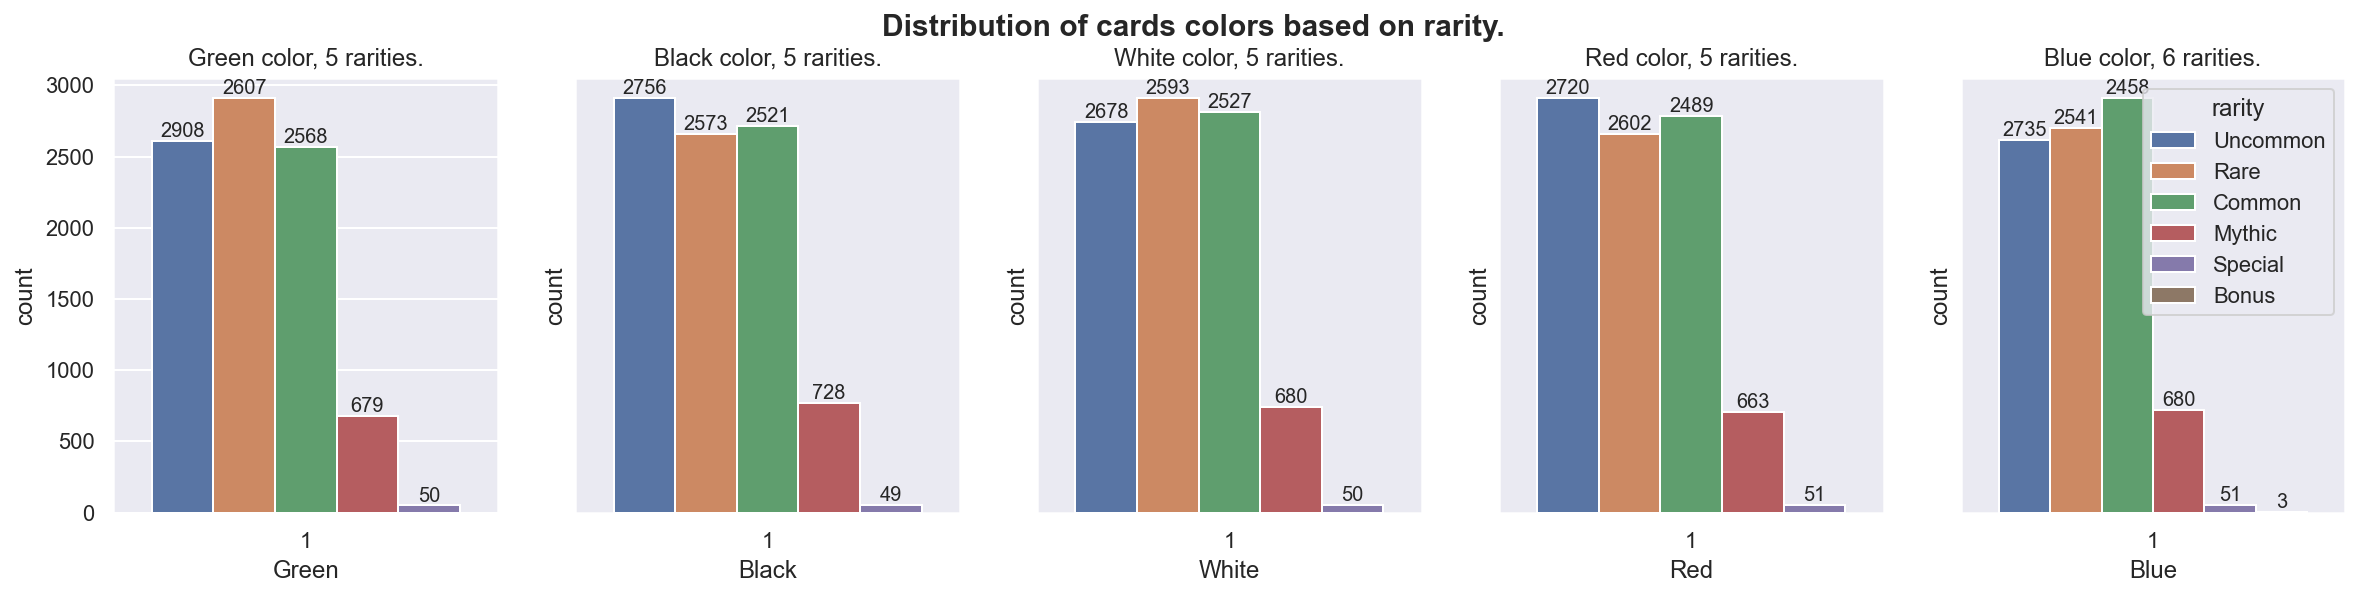

In [12]:
plot_color_distribution(subdf)

In [13]:
rar_full = df["rarity"].value_counts()
rar_sub = subdf["rarity"].value_counts()
sum_full = rar_full.values.sum()
sum_sub = rar_sub.values.sum()

share_full = rar_full.apply(lambda x: x/sum_full)
share_sub = rar_sub.apply(lambda x: x/sum_sub)

df_rar_col = pd.DataFrame(data=np.c_[rar_full.values, share_full.values, rar_sub.values, share_sub.values],
                          index=rar_full.index,
                          columns=["With_NaNs", "RelFreq_NaNs",
                                   "No_NaNs", "RelFreq_No_NaNs"])
df_rar_col["Change"] = df_rar_col["No_NaNs"]/df_rar_col["With_NaNs"]
df_rar_col["RelFreqChange"] =  1 - df_rar_col["RelFreq_No_NaNs"]/df_rar_col["RelFreq_NaNs"]
df_rar_col

,With_NaNs,RelFreq_NaNs,No_NaNs,RelFreq_No_NaNs,Change,RelFreqChange
Common,17449.0,0.369283,13206.0,0.353376,0.756834,0.043077
Rare,13587.0,0.287549,10866.0,0.290760,0.799735,-0.011166
Uncommon,13332.0,0.282153,10857.0,0.290519,0.814356,-0.029653
Mythic,2630.0,0.055660,2233.0,0.059752,0.849049,-0.073518
Special,244.0,0.005164,206.0,0.005512,0.844262,-0.067465
Bonus,9.0,0.000190,3.0,0.000080,0.333333,0.578541


### Процент карт, запрещенных в формате Commander, а также распределение по типу для этих карт

In [14]:
df["legalities"].value_counts().index[100]

"[{'format': 'Commander', 'legality': 'Legal'}, {'format': 'Duel', 'legality': 'Legal'}, {'format': 'Gladiator', 'legality': 'Legal'}, {'format': 'Historic', 'legality': 'Banned'}, {'format': 'Historicbrawl', 'legality': 'Legal'}, {'format': 'Legacy', 'legality': 'Legal'}, {'format': 'Premodern', 'legality': 'Legal'}, {'format': 'Vintage', 'legality': 'Legal'}]"

In [15]:
def recreate_legalities(df):
    df["legalities"] = [ast.literal_eval(x) for x in df["legalities"].values]
    return df

In [16]:
subdf1 = recreate_legalities(df.dropna(subset=["legalities"])[["name", "legalities", "type"]])

In [17]:
subdf1["legalities"]

0        [{'format': 'Commander', 'legality': 'Legal'},...
1        [{'format': 'Commander', 'legality': 'Legal'},...
2        [{'format': 'Commander', 'legality': 'Legal'},...
4        [{'format': 'Commander', 'legality': 'Legal'},...
6        [{'format': 'Commander', 'legality': 'Legal'},...
                               ...                        
66758    [{'format': 'Alchemy', 'legality': 'Legal'}, {...
66759    [{'format': 'Alchemy', 'legality': 'Legal'}, {...
66760    [{'format': 'Alchemy', 'legality': 'Legal'}, {...
66761    [{'format': 'Alchemy', 'legality': 'Legal'}, {...
66762    [{'format': 'Alchemy', 'legality': 'Legal'}, {...
Name: legalities, Length: 46215, dtype: object

In [18]:
def check_fmt(x, f):
    for d in x:
        if d["format"] == f:
            return d["legality"]
    return None


def assign_format(df, f="Commander"):
    return df["legalities"].apply(lambda x: check_fmt(x, f))

In [19]:
subdf1["Commander"] = assign_format(subdf1)

In [20]:
subdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46215 entries, 0 to 66762
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        46215 non-null  object
 1   legalities  46215 non-null  object
 2   type        46215 non-null  object
 3   Commander   46215 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [21]:
print("-"*15)
print("Commander in legalities:")
print(f"Count: {len(subdf1.Commander)}")
print(subdf1.Commander.value_counts())
print("-"*15)
print("Total cards in dataset:")
print(f"{len(df.index)}")
print("-"*15)
print("Share of Banned:")
print(f"{len(subdf1[subdf1['Commander'] == 'Banned'])/len(df.index) * 100:.3f}%")
print("-"*15)

---------------
Commander in legalities:
Count: 46215
Legal     46006
Banned      209
Name: Commander, dtype: int64
---------------
Total cards in dataset:
47251
---------------
Share of Banned:
0.442%
---------------


In [22]:
banned_c = subdf1[subdf1["Commander"] == "Banned"]
banned_c

,name,legalities,type,Commander
510,Balance,"[{'format': 'Commander', 'legality': 'Banned'}...",Sorcery,Banned
524,Crusade,"[{'format': 'Commander', 'legality': 'Banned'}...",Enchantment,Banned
555,Ancestral Recall,"[{'format': 'Commander', 'legality': 'Banned'}...",Instant,Banned
591,Time Walk,"[{'format': 'Commander', 'legality': 'Banned'}...",Sorcery,Banned
604,Contract from Below,"[{'format': 'Commander', 'legality': 'Banned'}...",Sorcery,Banned
...,...,...,...,...
63004,"Rofellos, Llanowar Emissary","[{'format': 'Commander', 'legality': 'Banned'}...",Legendary Creature — Elf Druid,Banned
63062,Time Vault,"[{'format': 'Commander', 'legality': 'Banned'}...",Artifact,Banned
63078,Library of Alexandria,"[{'format': 'Commander', 'legality': 'Banned'}...",Land,Banned
63094,Tolarian Academy,"[{'format': 'Commander', 'legality': 'Banned'}...",Legendary Land,Banned


In [23]:
banned_c["type"].value_counts()

Sorcery                                 54
Artifact                                38
Conspiracy                              25
Enchantment                             23
Instant                                 12
Legendary Land                           7
Artifact Creature — Golem                6
Creature — Giant                         5
Creature — Human Nomad                   4
Legendary Creature — Eldrazi             4
Legendary Creature — Angel               3
Legendary Creature — Human Minion        3
Legendary Creature — Elf Advisor         3
Land                                     3
Creature — Merfolk Pirate                2
Legendary Creature — Demon               2
Creature — Devil                         2
Legendary Artifact                       2
Creature — Efreet                        2
Legendary Creature — Elf Druid           2
Creature — Avatar                        1
Creature — Horror                        1
Legendary Creature — Elemental Otter     1
Enchantment

In [24]:
types = [
    "Creature",
    "Enchantment",
    "Land",
    "Artifact",
    "Instant",
    "Sorcery",
    "Conspiracy",
    "Tribal",
    "Scheme",
    "Vanguard",
    "Plane",
    "Planeswalker",
    "Dungeon",
    "Phenomenon"
]


def find_second_type(line, types=types):
    ts = []
    for t in types:
        if re.search(t, line):
            ts.append(re.search(t, line).group(0))
    if len(ts) > 1:
        return ts[1]
    return None


def find_types(line, types=types):
    for t in types:
        if re.search(t, line):
            return re.search(t, line).group(0)
    

def assign_types(df):
    df["basic_type"] = df["type"].apply(lambda x: find_types(x))
    df["second_basic_type"] = df["type"].apply(lambda x: find_second_type(x))
    return df

In [25]:
banned_c = assign_types(banned_c)
banned_c

/var/folders/sr/s8tdfzns1b5b8grynwwcxsv40000gn/T/ipykernel_1636/1657099775.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["basic_type"] = df["type"].apply(lambda x: find_types(x))
/var/folders/sr/s8tdfzns1b5b8grynwwcxsv40000gn/T/ipykernel_1636/1657099775.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["second_basic_type"] = df["type"].apply(lambda x: find_second_type(x))


,name,legalities,type,Commander,basic_type,second_basic_type
510,Balance,"[{'format': 'Commander', 'legality': 'Banned'}...",Sorcery,Banned,Sorcery,None
524,Crusade,"[{'format': 'Commander', 'legality': 'Banned'}...",Enchantment,Banned,Enchantment,None
555,Ancestral Recall,"[{'format': 'Commander', 'legality': 'Banned'}...",Instant,Banned,Instant,None
591,Time Walk,"[{'format': 'Commander', 'legality': 'Banned'}...",Sorcery,Banned,Sorcery,None
604,Contract from Below,"[{'format': 'Commander', 'legality': 'Banned'}...",Sorcery,Banned,Sorcery,None
...,...,...,...,...,...,...
63004,"Rofellos, Llanowar Emissary","[{'format': 'Commander', 'legality': 'Banned'}...",Legendary Creature — Elf Druid,Banned,Creature,None
63062,Time Vault,"[{'format': 'Commander', 'legality': 'Banned'}...",Artifact,Banned,Artifact,None
63078,Library of Alexandria,"[{'format': 'Commander', 'legality': 'Banned'}...",Land,Banned,Land,None
63094,Tolarian Academy,"[{'format': 'Commander', 'legality': 'Banned'}...",Legendary Land,Banned,Land,None


In [26]:
banned_c["second_basic_type"].value_counts()

Artifact    7
Name: second_basic_type, dtype: int64

In [27]:
def plot_illegal_commander(banned_c):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(ax=ax, data=banned_c, x="basic_type")
    ax.bar_label(ax.containers[0])
    ax.set(title=f"Distribution of basic types among cards banned in Commander format ({len(banned_c.index)} cards).")
#     plt.savefig(fname=f"visualizations/one-types-banned-commander.png",
#     dpi=300,
#     bbox_inches="tight",
#     pad_inches=0.2,
#     format='png'
#     )

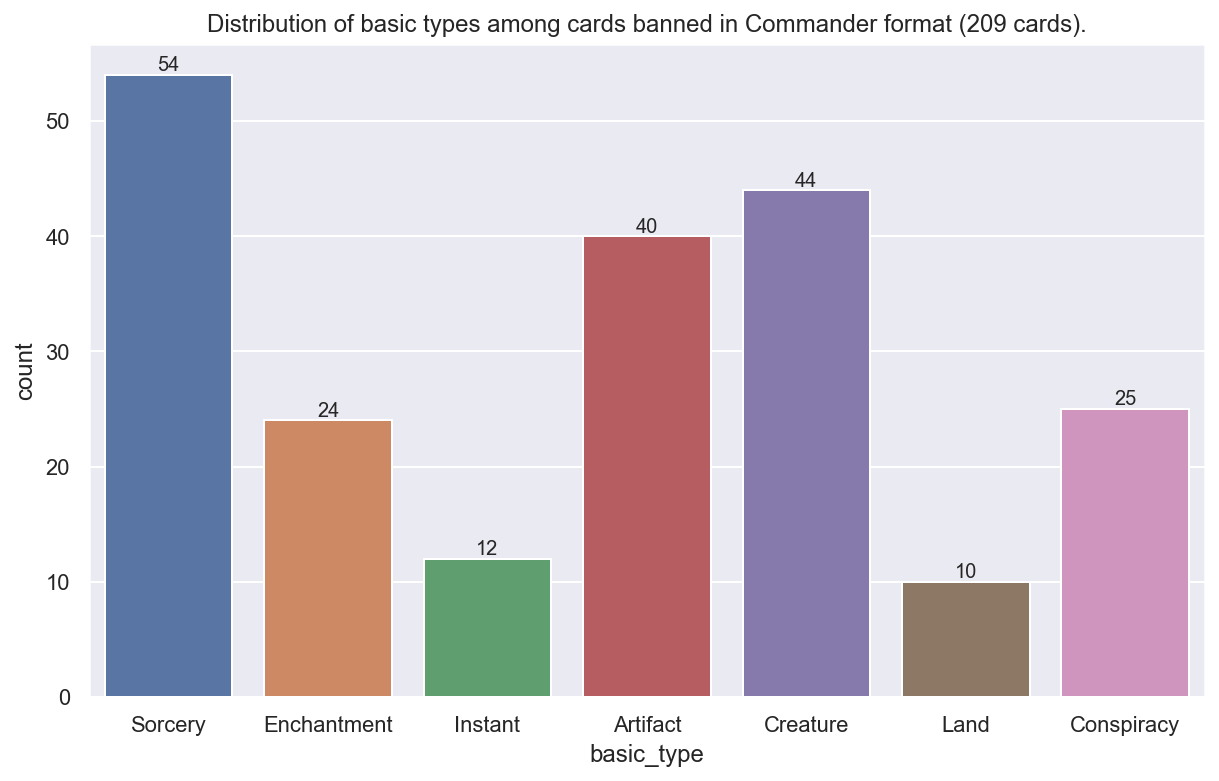

In [28]:
plot_illegal_commander(banned_c)

In [29]:
banned_c.dropna(subset=["second_basic_type"]).groupby(["type"]).apply(lambda a: a[:])

name  \
type                                                                 
Artifact Creature — Golem           1101           Sundering Titan   
                                    4538           Sundering Titan   
                                    7204           Sundering Titan   
                                    19215          Sundering Titan   
                                    38706          Sundering Titan   
                                    62482          Sundering Titan   
Legendary Artifact Creature — Scout 32239  Golos, Tireless Pilgrim   

                                                                                  legalities  \
type                                                                                           
Artifact Creature — Golem           1101   [{'format': 'Commander', 'legality': 'Banned'}...   
                                    4538   [{'format': 'Commander', 'legality': 'Banned'}...   
                                    7204   [{'format': 'Commander', 'legality': 'Banned'}...   
                                    19215  [{'format': 'Commander', 'legality': 'Banned'}...   
                                    38706  [{'format': 'Commander', 'legality': 'Banned'}...   
                                    62482  [{'format': 'Commander', 'legality': 'Banned'}...   
Legendary Artifact Creature — Scout 32239  [{'format': 'Commander', 'legality': 'Banned'}...   

                                                                          type  \
type                                                                             
Artifact Creature — Golem           1101             Artifact Creature — Golem   
                                    4538             Artifact Creature — Golem   
                                    7204             Artifact Creature — Golem   
                                    19215            Artifact Creature — Golem   
                                    38706            Artifact Creature — Golem   
                                    62482            Artifact Creature — Golem   
Legendary Artifact Creature — Scout 32239  Legendary Artifact Creature — Scout   

                                          Commander basic_type  \
type                                                             
Artifact Creature — Golem           1101     Banned   Creature   
                                    4538     Banned   Creature   
                                    7204     Banned   Creature   
                                    19215    Banned   Creature   
                                    38706    Banned   Creature   
                                    62482    Banned   Creature   
Legendary Artifact Creature — Scout 32239    Banned   Creature   

                                          second_basic_type  
type                                                         
Artifact Creature — Golem           1101           Artifact  
                                    4538           Artifact  
                                    7204           Artifact  
                                    19215          Artifact  
                                    38706          Artifact  
                                    62482          Artifact  
Legendary Artifact Creature — Scout 32239          Artifact

### Топ-10 карт, не являющихся землями, которые были напечатаны в наибольшем количестве сетов.

In [30]:
df.set.value_counts()

CMR     716
NEO     537
JMP     495
MH2     492
VOW     487
       ... 
PTOR      1
PUDS      1
PULG      1
PUSG      1
P5DN      1
Name: set, Length: 268, dtype: int64

In [31]:
df.set_name.value_counts()

Commander Legends         716
Kamigawa: Neon Dynasty    537
Jumpstart                 495
Modern Horizons 2         492
Innistrad: Crimson Vow    487
                         ... 
Torment Promos              1
Urza's Destiny Promos       1
Urza's Legacy Promos        1
Urza's Saga Promos          1
Fifth Dawn Promos           1
Name: set_name, Length: 268, dtype: int64

In [32]:
subdf2 = df[["name", "type", "set_name"]]
subdf2 = assign_types(subdf2)
subdf2

/var/folders/sr/s8tdfzns1b5b8grynwwcxsv40000gn/T/ipykernel_1636/1657099775.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["basic_type"] = df["type"].apply(lambda x: find_types(x))
/var/folders/sr/s8tdfzns1b5b8grynwwcxsv40000gn/T/ipykernel_1636/1657099775.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["second_basic_type"] = df["type"].apply(lambda x: find_second_type(x))


,name,type,set_name,basic_type,second_basic_type
0,Ancestor's Chosen,Creature — Human Cleric,Tenth Edition,Creature,None
1,Ancestor's Chosen,Creature — Human Cleric,Tenth Edition,Creature,None
2,Angel of Mercy,Creature — Angel,Tenth Edition,Creature,None
4,Angelic Blessing,Sorcery,Tenth Edition,Sorcery,None
6,Angelic Chorus,Enchantment,Tenth Edition,Enchantment,None
...,...,...,...,...,...
66758,Plains,Basic Land — Plains,Zendikar Rising,Land,None
66759,Island,Basic Land — Island,Zendikar Rising,Land,None
66760,Swamp,Basic Land — Swamp,Zendikar Rising,Land,None
66761,Mountain,Basic Land — Mountain,Zendikar Rising,Land,None


In [33]:
subdf2.basic_type.value_counts()

Creature       22426
Instant         5614
Sorcery         5248
Land            5029
Enchantment     4725
Artifact        3367
Plane            613
Vanguard         117
Scheme            65
Conspiracy        25
Phenomenon        16
Name: basic_type, dtype: int64

In [34]:
subdf2.second_basic_type.value_counts(), len(subdf2.index)

(Artifact        1522
 Planeswalker     461
 Enchantment      259
 Tribal            97
 Land               7
 Instant            2
 Name: second_basic_type, dtype: int64,
 47251)

In [35]:
subdf2 = subdf2[(subdf2["basic_type"] != "Land") & (subdf2["second_basic_type"] != "Land")]
subdf2

,name,type,set_name,basic_type,second_basic_type
0,Ancestor's Chosen,Creature — Human Cleric,Tenth Edition,Creature,None
1,Ancestor's Chosen,Creature — Human Cleric,Tenth Edition,Creature,None
2,Angel of Mercy,Creature — Angel,Tenth Edition,Creature,None
4,Angelic Blessing,Sorcery,Tenth Edition,Sorcery,None
6,Angelic Chorus,Enchantment,Tenth Edition,Enchantment,None
...,...,...,...,...,...
66751,"Zareth San, the Trickster",Legendary Creature — Merfolk Rogue,Zendikar Rising,Creature,None
66752,Forsaken Monument,Legendary Artifact,Zendikar Rising,Artifact,None
66753,Lithoform Engine,Legendary Artifact,Zendikar Rising,Artifact,None
66754,Myriad Construct,Artifact Creature — Construct,Zendikar Rising,Creature,Artifact


In [36]:
subdf2.groupby(["name"]).count().sort_values(by="set_name", ascending=False)[:10]

,type,set_name,basic_type,second_basic_type
name,,,,
Sol Ring,30,30,30,0
Serra Angel,29,29,29,0
Giant Growth,29,29,29,0
Counterspell,29,29,29,0
Swords to Plowshares,28,28,28,0
Pacifism,25,25,25,0
Air Elemental,24,24,24,0
Disenchant,24,24,24,0
Dark Ritual,24,24,24,0


In [37]:
def print_card_sets(name):
    a = subdf2[subdf2["name"] == name]["set_name"].values
    print(f"{name} in {len(a)} sets.")
    print("-"*15)
    for t in a.reshape(10,3):
        print(f"{t[0]} -- {t[1]} -- {t[2]}")

In [38]:
print_card_sets("Sol Ring")

Sol Ring in 30 sets.
---------------
Unlimited Edition -- Revised Edition -- Forgotten Realms Commander
Commander 2013 -- Commander 2014 -- Commander 2015
Commander 2016 -- Commander 2017 -- Commander 2018
Commander 2019 -- Commander 2020 -- Commander 2021
Commander Collection: Green -- Commander Anthology Volume II -- Commander Anthology
Commander 2011 -- Commander Legends -- Commander Legends
Kaldheim Commander -- Limited Edition Alpha -- Limited Edition Beta
Masters Edition IV -- Midnight Hunt Commander -- Kaladesh Inventions
New Capenna Commander -- Neon Dynasty Commander -- From the Vault: Relics
Vintage Masters -- Crimson Vow Commander -- Zendikar Rising Commander


### Для карт, не являющихся землями, определите, какая часть из них даёт ману с помощью своего эффекта. Покажите распределение по типу маны, который дают эти карты.

In [39]:
subdf3 = assign_types(df)
subdf3 = subdf3[(subdf3["basic_type"] != "Land") & (subdf3["second_basic_type"] != "Land")]
subdf3.columns, len(subdf3.index)

(Index(['name', 'multiverse_id', 'layout', 'mana_cost', 'cmc', 'colors',
        'color_identity', 'type', 'supertypes', 'subtypes', 'rarity', 'text',
        'flavor', 'artist', 'number', 'power', 'toughness', 'loyalty',
        'variations', 'watermark', 'hand', 'life', 'rulings', 'foreign_names',
        'printings', 'original_text', 'original_type', 'legalities',
        'image_url', 'set', 'set_name', 'id', 'basic_type',
        'second_basic_type'],
       dtype='object'),
 42215)

In [40]:
subdf3["text"].value_counts()

Flying                                                                                                                                                                                                                                                            227
Flying, vigilance                                                                                                                                                                                                                                                  63
{T}: Add {G}.                                                                                                                                                                                                                                                      56
Flying (This creature can't be blocked except by creatures with flying or reach.)                                                                                                                                     

In [41]:
subdf3[subdf3["name"] == "Deathrite Shaman"]["text"].value_counts()

{T}: Exile target land card from a graveyard. Add one mana of any color.\n{B}, {T}: Exile target instant or sorcery card from a graveyard. Each opponent loses 2 life.\n{G}, {T}: Exile target creature card from a graveyard. You gain 2 life.    3
Name: text, dtype: int64

In [42]:
subdf3[subdf3["name"] == "Koth of the Hammer"][["text"]].value_counts()

text                                                                                                                                                                                                                                                              
[+1]: Untap target Mountain. It becomes a 4/4 red Elemental creature until end of turn. It's still a land.\n[−2]: Add {R} for each Mountain you control.\n[−5]: You get an emblem with "Mountains you control have '{T}: This land deals 1 damage to any target.'"    2
dtype: int64

In [43]:
subdf3[subdf3["name"] == "Koth of the Hammer"]["loyalty"].value_counts()

3    2
Name: loyalty, dtype: int64

In [44]:
subdf3[subdf3["name"] == "Dark Ritual"][["text", "original_text"]].iloc[0]

text                                  Add {B}{B}{B}.
original_text    Add 3 black mana to your mana pool.
Name: 606, dtype: object

In [45]:
subdf3[subdf3["basic_type"] == "Sorcery"]["subtypes"].value_counts()

['Arcane']       49
['Lesson']       26
['Elf']           7
['Rogue']         5
['Goblin']        4
['Eldrazi']       4
['Merfolk']       3
['Giant']         3
['Elemental']     1
Name: subtypes, dtype: int64

In [46]:
def find_activated_abilities(x):
    a = tuple()
    for line in x:
        if re.search(":", line):
            a += (line,)
    return a


def find_triggered_abilities(x):
    a = tuple()
    for line in x:
        line1 = line.lower()
        if re.search(",", line1):
            if re.search("whenever ", line1) or re.search("at ", line1) or re.search("when ", line1):
                a += (line,)
    return a


def find_mana_activated(x):
    a = tuple()
    for line in x:
        line1 = line.lower()
        if not re.search("target", line1):
            if (re.search(r"{[a-z]}", line1) or re.search("mana", line1)) and (re.search("(add |adds )", line1) or re.search("double", line1)):
                a += (line,)   
    return a


def find_mana_triggered(x):
    a = tuple()
    for line in x:
        line1 = line.lower()
        cause = line1.split(",")[0]  # part of line before comma
        if not re.search("target", line1):
            if (re.search(r"{[a-z]}", cause) or re.search("mana", cause)):
                if (re.search(r"{[a-z]}", line1) or re.search("mana", line1)) and (re.search("add", line1) or re.search("double", line1)):
                    a += (line,)
            
    return a
    


def assign_mana_abilities(subdf3, delimiter="\n"):
    subdf3["loyalty"] = subdf3["loyalty"].apply(lambda x: x if isinstance(x, str) else 0)
    subdf3 = subdf3[subdf3["loyalty"] == 0].dropna(subset=["text"])
    subdf3["text"] = subdf3["text"].apply(lambda x: x.split(delimiter) if re.search(delimiter, x) else [x])
    
    subdf3["activated_ability"] = subdf3["text"].apply(find_activated_abilities)
    subdf3["triggered_ability"] = subdf3["text"].apply(find_triggered_abilities)
    
    subdf3["mana_from_activated"] = subdf3["activated_ability"].apply(find_mana_activated)
    subdf3["mana_from_triggered"] = subdf3["triggered_ability"].apply(find_mana_triggered)
    
    subdf3["mana_ability"] = subdf3["mana_from_activated"] + subdf3["mana_from_triggered"]
    
     
    return subdf3

In [47]:
mana = assign_mana_abilities(subdf3.copy())
mana

,name,multiverse_id,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,...,set,set_name,id,basic_type,second_basic_type,activated_ability,triggered_ability,mana_from_activated,mana_from_triggered,mana_ability
0,Ancestor's Chosen,130550.0,normal,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,"['Human', 'Cleric']",...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,Creature,None,(),(When Ancestor's Chosen enters the battlefield...,(),(),()
1,Ancestor's Chosen,NaN,normal,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,"['Human', 'Cleric']",...,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42,Creature,None,(),(When Ancestor's Chosen enters the battlefield...,(),(),()
2,Angel of Mercy,129465.0,normal,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,['Angel'],...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,Creature,None,(),"(When Angel of Mercy enters the battlefield, y...",(),(),()
4,Angelic Blessing,129711.0,normal,{2}{W},3.0,['White'],['W'],Sorcery,NaN,NaN,...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,Sorcery,None,(),(),(),(),()
6,Angelic Chorus,129710.0,normal,{3}{W}{W},5.0,['White'],['W'],Enchantment,NaN,NaN,...,10E,Tenth Edition,3b77bb52-4181-57f5-b3cd-f3a15b95aa29,Enchantment,None,(),(Whenever a creature enters the battlefield un...,(),(),()
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66751,"Zareth San, the Trickster",495661.0,normal,{3}{U}{B},5.0,"['Black', 'Blue']","['B', 'U']",Legendary Creature — Merfolk Rogue,['Legendary'],"['Merfolk', 'Rogue']",...,ZNR,Zendikar Rising,b7c4d629-4cdd-573d-a19a-363ad7f095dc,Creature,None,"({2}{U}{B}, Return an unblocked attacking Rogu...",(Whenever Zareth San deals combat damage to a ...,(),(),()
66752,Forsaken Monument,495662.0,normal,{5},5.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,...,ZNR,Zendikar Rising,bece5558-8292-58ec-b2e5-9705ee174c97,Artifact,None,(),"(Whenever you tap a permanent for {C}, add an ...",(),"(Whenever you tap a permanent for {C}, add an ...","(Whenever you tap a permanent for {C}, add an ..."
66753,Lithoform Engine,495663.0,normal,{4},4.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,...,ZNR,Zendikar Rising,3d0db380-3fa9-5ed1-8106-535eba2c266d,Artifact,None,"({2}, {T}: Copy target activated or triggered ...",(),(),(),()
66754,Myriad Construct,495664.0,normal,{4},4.0,NaN,NaN,Artifact Creature — Construct,NaN,['Construct'],...,ZNR,Zendikar Rising,82e28780-671f-5813-8d68-0a32d45a79f1,Creature,Artifact,(),(When Myriad Construct becomes the target of a...,(),(),()


In [48]:
have_mana = ["Caged Sun", "Chromatic Star", "Chromatic Sphere",
             "Pristine Talisman", "Birds of Paradise", "Ur-Golem's Eye",
             "Gauntlet of Power", "Overgrowth", "Marble Diamond", "Llanowar Elves"]

for name in have_mana:
    print(name)
    print(mana[mana["name"] == name]["mana_ability"].value_counts().index)
    print("-"*15)

Caged Sun
Index([('Whenever a land's ability causes you to add one or more mana of the chosen color, add one additional mana of that color.',)], dtype='object')
---------------
Chromatic Star
Index([('{1}, {T}, Sacrifice Chromatic Star: Add one mana of any color.',)], dtype='object')
---------------
Chromatic Sphere
Index([('{1}, {T}, Sacrifice Chromatic Sphere: Add one mana of any color. Draw a card.',)], dtype='object')
---------------
Pristine Talisman
Index([('{T}: Add {C}. You gain 1 life.',)], dtype='object')
---------------
Birds of Paradise
Index([('{T}: Add one mana of any color.',)], dtype='object')
---------------
Ur-Golem's Eye
Index([('{T}: Add {C}{C}.',)], dtype='object')
---------------
Gauntlet of Power
Index([('Whenever a basic land is tapped for mana of the chosen color, its controller adds an additional one mana of that color.',)], dtype='object')
---------------
Overgrowth
Index([('Whenever enchanted land is tapped for mana, its controller adds an additional {G}{G}.

In [49]:
not_mana = ["Deathrite Shaman", "Koth of the Hammer"]

for name in not_mana:
    print(name)
    print(mana[mana["name"] == name]["mana_ability"].value_counts().index)
    print("-"*15)

Deathrite Shaman
Index([()], dtype='object')
---------------
Koth of the Hammer
Index([], dtype='object')
---------------


In [50]:
mana_abilities = mana[mana["mana_ability"] != ()]
mana_abilities

,name,multiverse_id,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,...,set,set_name,id,basic_type,second_basic_type,activated_ability,triggered_ability,mana_from_activated,mana_from_triggered,mana_ability
340,Birds of Paradise,129906.0,normal,{G},1.0,['Green'],['G'],Creature — Bird,NaN,['Bird'],...,10E,Tenth Edition,28e56ac7-6a09-5118-9ade-6755b051bc0b,Creature,None,"({T}: Add one mana of any color.,)",(),"({T}: Add one mana of any color.,)",(),"({T}: Add one mana of any color.,)"
364,Joiner Adept,130500.0,normal,{1}{G},2.0,['Green'],['G'],Creature — Elf Druid,NaN,"['Elf', 'Druid']",...,10E,Tenth Edition,2f39f144-a02a-5017-a45a-4a3cfc2c7a36,Creature,None,"(Lands you control have ""{T}: Add one mana of ...",(),"(Lands you control have ""{T}: Add one mana of ...",(),"(Lands you control have ""{T}: Add one mana of ..."
367,Llanowar Elves,129626.0,normal,{G},1.0,['Green'],['G'],Creature — Elf Druid,NaN,"['Elf', 'Druid']",...,10E,Tenth Edition,51106f17-5dd1-5853-b45b-453d83b9d979,Creature,None,"({T}: Add {G}.,)",(),"({T}: Add {G}.,)",(),"({T}: Add {G}.,)"
380,Overgrowth,135282.0,normal,{2}{G},3.0,['Green'],['G'],Enchantment — Aura,NaN,['Aura'],...,10E,Tenth Edition,f4cf6ecc-c308-5d3f-8358-ab273f375a68,Enchantment,None,(),"(Whenever enchanted land is tapped for mana, i...",(),"(Whenever enchanted land is tapped for mana, i...","(Whenever enchanted land is tapped for mana, i..."
424,Chromatic Star,135279.0,normal,{1},1.0,NaN,NaN,Artifact,NaN,NaN,...,10E,Tenth Edition,3785490a-01f5-511d-b471-60b1209b3d4f,Artifact,None,"({1}, {T}, Sacrifice Chromatic Star: Add one m...",(When Chromatic Star is put into a graveyard f...,"({1}, {T}, Sacrifice Chromatic Star: Add one m...",(),"({1}, {T}, Sacrifice Chromatic Star: Add one m..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66597,Forsaken Monument,491895.0,normal,{5},5.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,...,ZNR,Zendikar Rising,8c8728b6-c369-5d10-896e-3ec0967bbe1e,Artifact,None,(),"(Whenever you tap a permanent for {C}, add an ...",(),"(Whenever you tap a permanent for {C}, add an ...","(Whenever you tap a permanent for {C}, add an ..."
66605,Skyclave Relic,491903.0,normal,{3},3.0,NaN,NaN,Artifact,NaN,NaN,...,ZNR,Zendikar Rising,ba20b3d8-eb35-592d-b0d0-afdeb0145108,Artifact,None,"({T}: Add one mana of any color.,)","(When Skyclave Relic enters the battlefield, i...","({T}: Add one mana of any color.,)",(),"({T}: Add one mana of any color.,)"
66608,Stonework Packbeast,491906.0,normal,{2},2.0,NaN,NaN,Artifact Creature — Beast,NaN,['Beast'],...,ZNR,Zendikar Rising,51c154c6-a67b-56bb-9713-c2b10b936e4f,Creature,Artifact,"({2}: Add one mana of any color.,)",(),"({2}: Add one mana of any color.,)",(),"({2}: Add one mana of any color.,)"
66752,Forsaken Monument,495662.0,normal,{5},5.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,...,ZNR,Zendikar Rising,bece5558-8292-58ec-b2e5-9705ee174c97,Artifact,None,(),"(Whenever you tap a permanent for {C}, add an ...",(),"(Whenever you tap a permanent for {C}, add an ...","(Whenever you tap a permanent for {C}, add an ..."


In [51]:
mana_abilities["mana_ability"].value_counts()[120:180]

({1}, {T}: Add {U}{B}{R}. Spend this mana only to cast instant and/or sorcery spells.,)                                                                                                                                                                                                                                                                3
({4}{G}{G}: Double the number of +1/+1 counters on Dragonsguard Elite.,)                                                                                                                                                                                                                                                                               3
(Remove a charge counter from Pentad Prism: Add one mana of any color.,)                                                                                                                                                                                                                                              

In [52]:
m = mana_abilities[mana_abilities["name"] == "Chromatic Sphere"]["mana_ability"].values[0]
m = ("{T}: Add {G}, {B}, {C}, and/or {U}. Talisman of Curiosity deals 1 damage to you.",)


check_indicator = "(chosen|that|this) (color|type)"  # color of mana depends on previous conditions
check_any = "(any combination|any ((color|type)|one (color|type)|two (colors|types)))"  # any color
check_continuous = r"({W}|{B}|{C}|{U}|{G}|{R})+"  # several mana types
check_or = r"((({W}|{B}|{C}|{U}|{G}|{R}), )+|({W}|{B}|{C}|{U}|{G}|{R}) )or ({W}|{B}|{C}|{U}|{G}|{R})"  # if mana types are all available or restricted to "or" condition
check_and = r"((({W}|{B}|{C}|{U}|{G}|{R}), )+|({W}|{B}|{C}|{U}|{G}|{R}) )(and|and/or) ({W}|{B}|{C}|{U}|{G}|{R})"  # types available less than mana quantity given
check_restriction = r"(color|({W}|{B}|{C}|{U}|{G}|{R})) [A-z]+\ [A-z]+\ .+"  # color/{A-Z} has restriction on usage

check = {"continuous": check_continuous,
         "or": check_or,
         "any": check_any,
         "indicator": check_indicator,
         "and": check_and,
         "restriction": check_restriction}

In [53]:
def find_mana_type(line, way, check):
    matches = dict()
    if way == "activated":
        sen = line.split(":")[1].split(".")[0]  # extract part between ":" and "."
    else:
        sen = line.split(",")[1].split(".")[0]  # extract part between "," and "."
    for key, value in check.items():
        matches.update({key: re.search(value, sen)})

    if matches["or"]:
        matches["or"] = tuple(re.findall(r"({W}|{B}|{C}|{U}|{G}|{R})", sen))
        matches["continuous"] = None
    if matches["any"]:
        matches["any"] = matches["any"].group()
    if matches["indicator"]:
        matches["indicator"] = matches["indicator"].group()
    if matches["and"]:
        matches["and"] = tuple(re.findall(r"({W}|{B}|{C}|{U}|{G}|{R})", sen))
        matches["continuous"] = None
    if matches["restriction"]:
        matches["restriction"] = matches["restriction"].group(0)
    if matches["continuous"]:
        matches["continuous"] =  tuple(re.findall(r"({W}|{B}|{C}|{U}|{G}|{R})", sen))

    return matches


def assign_added_mana_type(data, check):
    for c in check.keys():
        data[c] = pd.Series(data=np.zeros, index=data.index, name=c)
    for index, abilities in zip(data.index, data["mana_ability"].values):
        if abilities != ():
            try:
                for a in abilities:
                    if a in data.loc[:, "mana_from_activated"].loc[index]:
                        d = find_mana_type(a, way="activated", check=check)
                    else:
                        d = find_mana_type(a, way="triggered", check=check)
                for key in d.keys():
                    data.loc[:, key].loc[index] = d[key]
            except Exception as e:
                print(index)
                print(key)
                print(d[key])
                print(a)
                print(e)
                raise TypeError
    return data

In [54]:
mana_dis = assign_added_mana_type(mana_abilities.copy(), check)
mana_dis

/Users/vagiz/Desktop/desktop_vagiz/Programming/env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,name,multiverse_id,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,...,triggered_ability,mana_from_activated,mana_from_triggered,mana_ability,continuous,or,any,indicator,and,restriction
340,Birds of Paradise,129906.0,normal,{G},1.0,['Green'],['G'],Creature — Bird,NaN,['Bird'],...,(),"({T}: Add one mana of any color.,)",(),"({T}: Add one mana of any color.,)",None,None,any color,None,None,None
364,Joiner Adept,130500.0,normal,{1}{G},2.0,['Green'],['G'],Creature — Elf Druid,NaN,"['Elf', 'Druid']",...,(),"(Lands you control have ""{T}: Add one mana of ...",(),"(Lands you control have ""{T}: Add one mana of ...",None,None,any color,None,None,None
367,Llanowar Elves,129626.0,normal,{G},1.0,['Green'],['G'],Creature — Elf Druid,NaN,"['Elf', 'Druid']",...,(),"({T}: Add {G}.,)",(),"({T}: Add {G}.,)","({G},)",None,None,None,None,None
380,Overgrowth,135282.0,normal,{2}{G},3.0,['Green'],['G'],Enchantment — Aura,NaN,['Aura'],...,"(Whenever enchanted land is tapped for mana, i...",(),"(Whenever enchanted land is tapped for mana, i...","(Whenever enchanted land is tapped for mana, i...","({G}, {G})",None,None,None,None,None
424,Chromatic Star,135279.0,normal,{1},1.0,NaN,NaN,Artifact,NaN,NaN,...,(When Chromatic Star is put into a graveyard f...,"({1}, {T}, Sacrifice Chromatic Star: Add one m...",(),"({1}, {T}, Sacrifice Chromatic Star: Add one m...",None,None,any color,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66597,Forsaken Monument,491895.0,normal,{5},5.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,...,"(Whenever you tap a permanent for {C}, add an ...",(),"(Whenever you tap a permanent for {C}, add an ...","(Whenever you tap a permanent for {C}, add an ...","({C},)",None,None,None,None,None
66605,Skyclave Relic,491903.0,normal,{3},3.0,NaN,NaN,Artifact,NaN,NaN,...,"(When Skyclave Relic enters the battlefield, i...","({T}: Add one mana of any color.,)",(),"({T}: Add one mana of any color.,)",None,None,any color,None,None,None
66608,Stonework Packbeast,491906.0,normal,{2},2.0,NaN,NaN,Artifact Creature — Beast,NaN,['Beast'],...,(),"({2}: Add one mana of any color.,)",(),"({2}: Add one mana of any color.,)",None,None,any color,None,None,None
66752,Forsaken Monument,495662.0,normal,{5},5.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,...,"(Whenever you tap a permanent for {C}, add an ...",(),"(Whenever you tap a permanent for {C}, add an ...","(Whenever you tap a permanent for {C}, add an ...","({C},)",None,None,None,None,None


In [55]:
s = 0
top = 5
indexes = []
for c in check.keys():
    values = len(mana_dis.dropna(subset=[c]))
    if c != "restriction":
        indexes.append(mana_dis.dropna(subset=[c]).index)
    print(f"{c}: {values}. Top {top}:")
    for index, count in zip(mana_dis[c].value_counts().index[:top], mana_dis[c].value_counts().values[:top]):
        print(f"----- {index}: {count}")
    s += values
    
print(f"Total without restriction: {s - len(mana_dis.dropna(subset=[c]))} out of {len(mana_abilities)} cards with mana abilities.")

continuous: 810. Top 5:
----- ('{C}',): 162
----- ('{G}',): 159
----- ('{C}', '{C}'): 90
----- ('{B}',): 52
----- ('{C}', '{C}', '{C}'): 43
or: 125. Top 5:
----- ('{W}', '{U}'): 13
----- ('{B}', '{R}'): 13
----- ('{U}', '{B}'): 12
----- ('{G}', '{W}'): 8
----- ('{G}', '{U}'): 8
any: 515. Top 5:
----- any color: 385
----- any one color: 69
----- any type: 39
----- any combination: 22
indicator: 26. Top 5:
----- chosen color: 17
----- that color: 9
and: 5. Top 5:
----- ('{R}', '{G}'): 5
restriction: 118. Top 5:
----- color in your commander's color identity: 29
----- color that a land an opponent controls could produce: 17
----- {C} for each charge counter on Everflowing Chalice: 10
----- {G} for each Elf you control: 9
----- {G} for each Elf on the battlefield: 4
Total without restriction: 1481 out of 1588 cards with mana abilities.


In [56]:
mana_dis.dropna(subset=["restriction"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 1063 to 66253
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 118 non-null    object 
 1   multiverse_id        118 non-null    float64
 2   layout               118 non-null    object 
 3   mana_cost            118 non-null    object 
 4   cmc                  118 non-null    float64
 5   colors               46 non-null     object 
 6   color_identity       56 non-null     object 
 7   type                 118 non-null    object 
 8   supertypes           9 non-null      object 
 9   subtypes             46 non-null     object 
 10  rarity               118 non-null    object 
 11  text                 118 non-null    object 
 12  flavor               85 non-null     object 
 13  artist               118 non-null    object 
 14  number               118 non-null    object 
 15  power                45 non-null   

In [57]:
for number, a in enumerate(indexes):
    for index in indexes[number+1:]:
        for i in a:
            if i in index:
                print(i)

17253
24528
29818
34975
62954


In [58]:
mana_dis["continuous"].value_counts()

({C},)                                                162
({G},)                                                159
({C}, {C})                                             90
({B},)                                                 52
({C}, {C}, {C})                                        43
({R},)                                                 42
({U},)                                                 29
({G}, {G})                                             27
({W},)                                                 25
({G}, {U})                                             15
({B}, {R})                                             13
({W}, {B})                                             13
({G}, {G}, {G})                                        12
({U}, {R})                                             12
({R}, {W})                                             11
({W}, {U})                                             11
({U}, {B})                                             10
({B}, {G})    

In [59]:
mana_dis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1588 entries, 340 to 66755
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1588 non-null   object 
 1   multiverse_id        1588 non-null   float64
 2   layout               1588 non-null   object 
 3   mana_cost            1561 non-null   object 
 4   cmc                  1588 non-null   float64
 5   colors               757 non-null    object 
 6   color_identity       1092 non-null   object 
 7   type                 1588 non-null   object 
 8   supertypes           107 non-null    object 
 9   subtypes             767 non-null    object 
 10  rarity               1588 non-null   object 
 11  text                 1588 non-null   object 
 12  flavor               1018 non-null   object 
 13  artist               1588 non-null   object 
 14  number               1588 non-null   object 
 15  power                638 non-null  

In [60]:
mana_dis["indicator"].value_counts()

chosen color    17
that color       9
Name: indicator, dtype: int64

In [61]:
colors = {
    "{W}": "White",
    "{B}": "Black",
    "{U}": "Blue",
    "{R}": "Red",
    "{G}": "Green",
    "{C}": "Colorless"
}


def assign_types(data):
    data["producing_mana_type"] = pd.Series(data=0, index=data.index, name="producing_mana_type")
    data["has_restriction"] = data["restriction"].apply(lambda x: 1 if x else 0)
    for color in colors.values():
        data[color] = pd.Series(data=0, index=data.index, name=color)
        
    for i in data.index:
        for c in ("continuous", "or", "any", "and", "indicator"):
            e = data.loc[:, c].loc[i]
            if e != None:
                if c in ("continuous", "or", "and"):
                    data.loc[:, "producing_mana_type"].loc[i] = e
                    for t in e:
                        data.loc[:, colors[t]].loc[i] = 1
                    
                if c == "any":
                    data.loc[:, "producing_mana_type"].loc[i] = ("{A}",)
                if c == "indicator":
                    data.loc[:, "producing_mana_type"].loc[i] = ("{I}",)
                continue
                
    return data[data["producing_mana_type"] != 0]

In [62]:
dis = assign_types(mana_dis.copy())
dis

/Users/vagiz/Desktop/desktop_vagiz/Programming/env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,name,multiverse_id,layout,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,...,and,restriction,producing_mana_type,has_restriction,White,Black,Blue,Red,Green,Colorless
340,Birds of Paradise,129906.0,normal,{G},1.0,['Green'],['G'],Creature — Bird,NaN,['Bird'],...,None,None,"({A},)",0,0,0,0,0,0,0
364,Joiner Adept,130500.0,normal,{1}{G},2.0,['Green'],['G'],Creature — Elf Druid,NaN,"['Elf', 'Druid']",...,None,None,"({A},)",0,0,0,0,0,0,0
367,Llanowar Elves,129626.0,normal,{G},1.0,['Green'],['G'],Creature — Elf Druid,NaN,"['Elf', 'Druid']",...,None,None,"({G},)",0,0,0,0,0,1,0
380,Overgrowth,135282.0,normal,{2}{G},3.0,['Green'],['G'],Enchantment — Aura,NaN,['Aura'],...,None,None,"({G}, {G})",0,0,0,0,0,1,0
424,Chromatic Star,135279.0,normal,{1},1.0,NaN,NaN,Artifact,NaN,NaN,...,None,None,"({A},)",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66597,Forsaken Monument,491895.0,normal,{5},5.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,...,None,None,"({C},)",0,0,0,0,0,0,1
66605,Skyclave Relic,491903.0,normal,{3},3.0,NaN,NaN,Artifact,NaN,NaN,...,None,None,"({A},)",0,0,0,0,0,0,0
66608,Stonework Packbeast,491906.0,normal,{2},2.0,NaN,NaN,Artifact Creature — Beast,NaN,['Beast'],...,None,None,"({A},)",0,0,0,0,0,0,0
66752,Forsaken Monument,495662.0,normal,{5},5.0,NaN,NaN,Legendary Artifact,['Legendary'],NaN,...,None,None,"({C},)",0,0,0,0,0,0,1


In [63]:
dis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 340 to 66755
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1476 non-null   object 
 1   multiverse_id        1476 non-null   float64
 2   layout               1476 non-null   object 
 3   mana_cost            1450 non-null   object 
 4   cmc                  1476 non-null   float64
 5   colors               681 non-null    object 
 6   color_identity       1013 non-null   object 
 7   type                 1476 non-null   object 
 8   supertypes           91 non-null     object 
 9   subtypes             699 non-null    object 
 10  rarity               1476 non-null   object 
 11  text                 1476 non-null   object 
 12  flavor               983 non-null    object 
 13  artist               1476 non-null   object 
 14  number               1476 non-null   object 
 15  power                603 non-null  

In [64]:
color_names = [color for color in colors.values()]
labels = color_names + ["Any", "Indicator"]


def plot_mana(data):  # 6 colors + 1 indicator + 1 any = 8 labels
    fig, ax = plt.subplots(figsize=(12,6))
    any_type = data["producing_mana_type"].apply(lambda x: 1 if x[0] == "{A}" else 0)
    indicator_type = data["producing_mana_type"].apply(lambda x: 1 if x[0] == "{I}" else 0)
    
    for i, color in enumerate(colors.values()):
        ax.bar(x=[i], height=[data[color].sum()])      
    ax.bar(x=[len(colors)], height=[any_type.sum()], label=f"Any mana type")
    ax.bar(x=[len(colors)+1], height=[indicator_type.sum()], label='Text: "This|That color"')
    ax.set_xticks(ticks=range(8), labels=labels)
    
    ax.legend()
    
    ax.set(title=f"Distribution of mana type given by mana ability. Count: {len(data)} cards.")
    
    for container in ax.containers:
        ax.bar_label(container)
        
#     plt.savefig(fname=f"visualizations/mana-types.png",
#     dpi=300,
#     bbox_inches="tight",
#     pad_inches=0.2,
#     format='png'
#     )

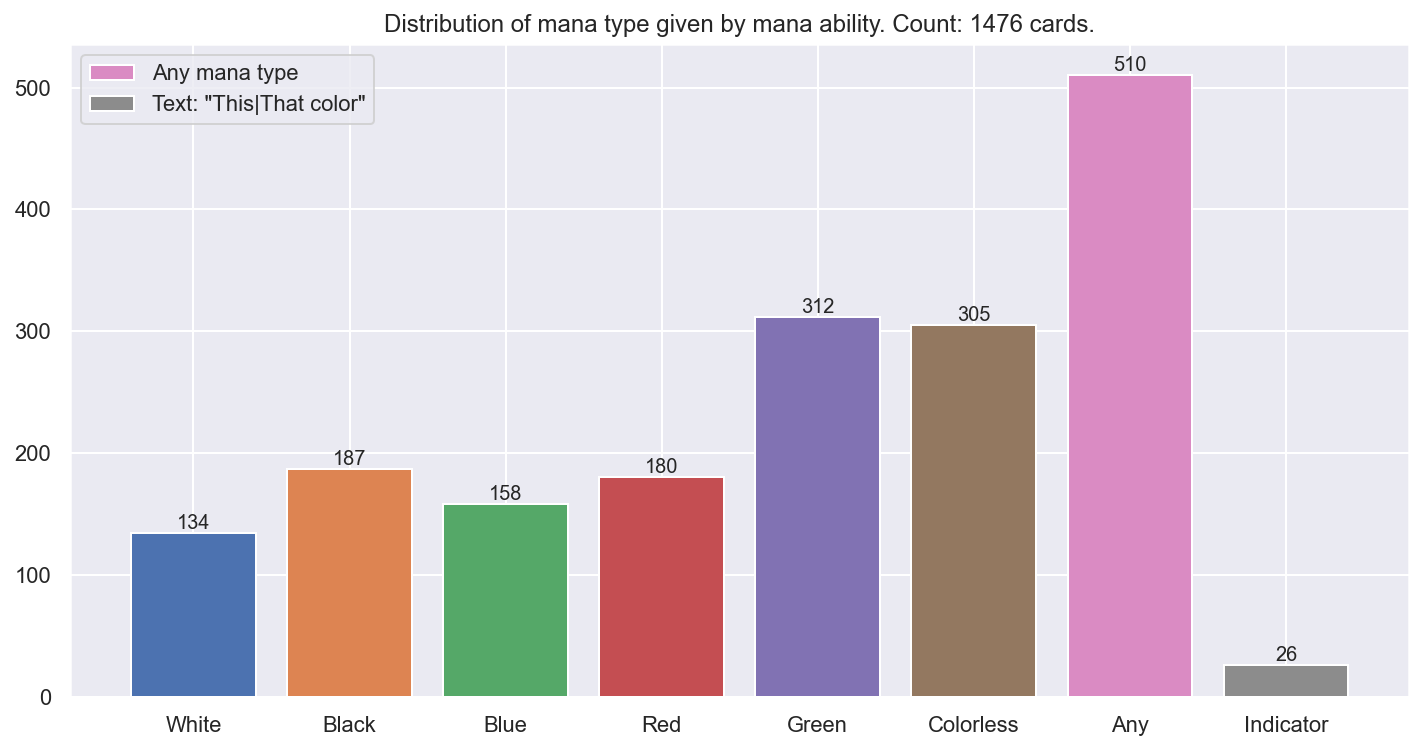

In [65]:
plot_mana(dis)

In [66]:
def plot_mana_restriction(data):  # 6 colors + 1 indicator + 1 any = 8 labels
    data = data[data["has_restriction"] == 0]
    fig, ax = plt.subplots(figsize=(12,6))
    any_type = data["producing_mana_type"].apply(lambda x: 1 if x[0] == "{A}" else 0)
    indicator_type = data["producing_mana_type"].apply(lambda x: 1 if x[0] == "{I}" else 0)
    
    for i, color in enumerate(colors.values()):
        ax.bar(x=[i], height=[data[color].sum()])      
    ax.bar(x=[len(colors)], height=[any_type.sum()], label=f"Any mana type")
    ax.bar(x=[len(colors)+1], height=[indicator_type.sum()], label='Text: "This|That color"')
    ax.set_xticks(ticks=range(8), labels=labels)
    
    ax.legend()
    
    ax.set(title=f"Distribution of mana type without restriction.Count: {len(data)} cards.")
    
    for container in ax.containers:
        ax.bar_label(container)

#     plt.savefig(fname=f"visualizations/mana-types-no-restriction.png",
#     dpi=300,
#     bbox_inches="tight",
#     pad_inches=0.2,
#     format='png'
#     )

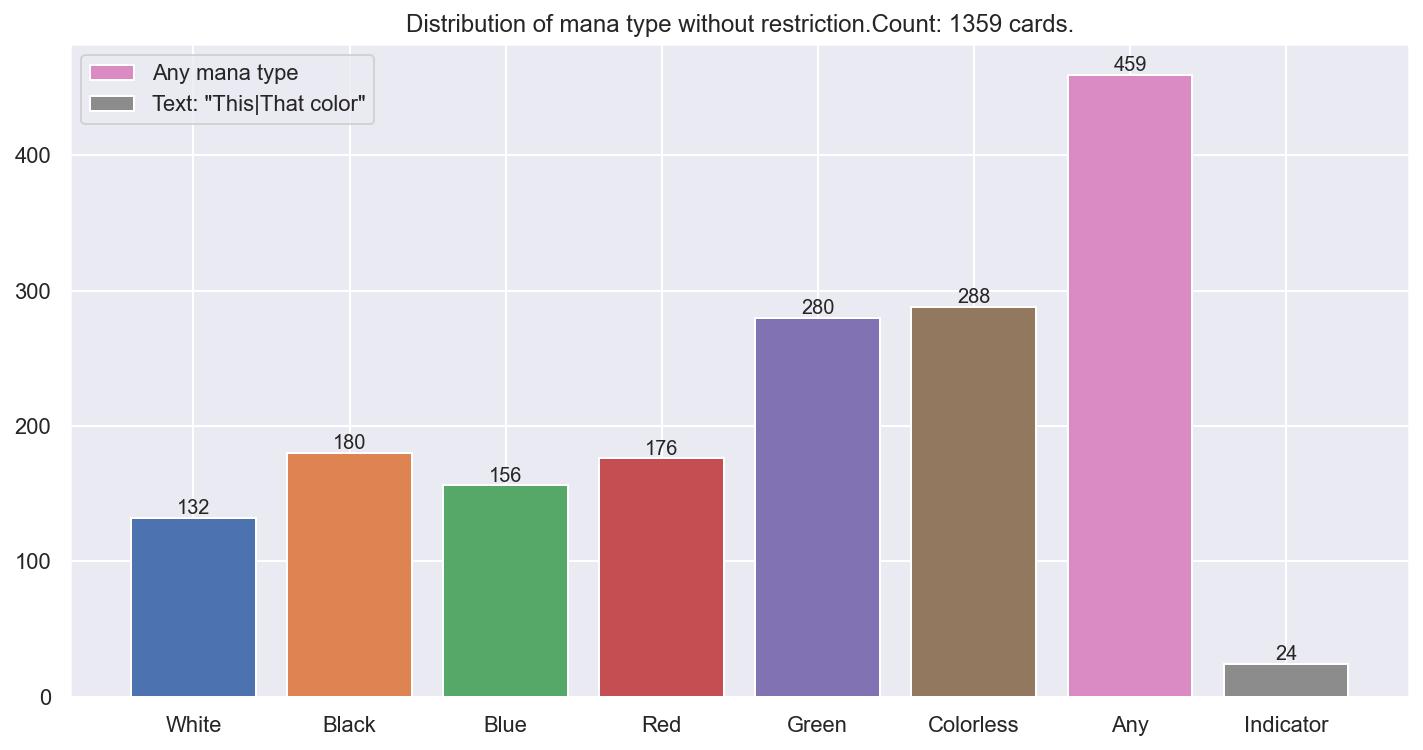

In [67]:
plot_mana_restriction(dis)